# TF-IDF

### Nombre: Jorge García

## Librerías

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
import matplotlib.pyplot as plt

## Datos

In [7]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,Id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
df['genero'] = df['genero'].str.replace('|',' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|',' ')
df.head()

,Id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
df['texto'] = df[['genero','plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)),axis=1)
df.head()

,Id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,texto
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action Adventure Fantasy Sci-Fi avatar future ...
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action Adventure Fantasy goddess marriage cere...
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action Adventure Thriller bomb espionage seque...
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action Thriller deception imprisonment lawless...
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary nan


## TF_IDF

In [12]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['texto'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44000 stored elements in Compressed Sparse Row format>

In [14]:
peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas.index = peliculas.index.str.strip()
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [16]:
indice =peliculas['The Following']
consulta =X[indice]
print(consulta.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [27]:
similitud =cosine_similarity(consulta,X)
similitud = similitud.flatten()
similitud

array([0.        , 0.        , 0.0257117 , ..., 0.09187877, 0.0344376 ,
       0.        ])

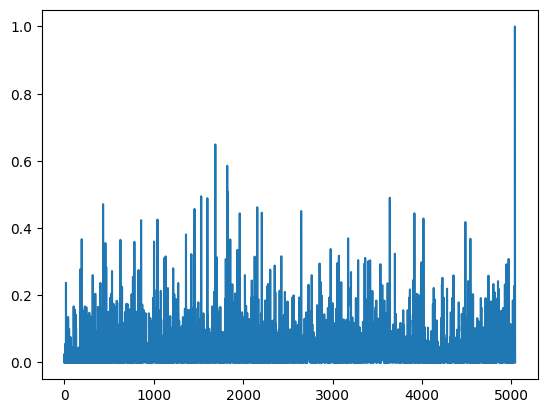

In [28]:
plt.plot(similitud)

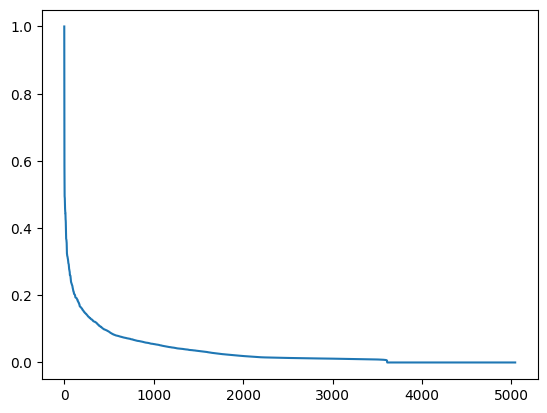

In [30]:
similitud_ordenado = (-similitud).argsort()
plt.plot(similitud[similitud_ordenado])

## Recomendación 

In [31]:
recomendacion = similitud_ordenado[1:11]
df['movie_title'].iloc[recomendacion]

1689                  88 Minutes 
1822                Suspect Zero 
1828                 Mindhunters 
1531                 The Watcher 
3640                 Lucky Break 
1600                       Se7en 
434                       Zodiac 
2158    The Silence of the Lambs 
1457                 Untraceable 
2649     Halloween: Resurrection 
Name: movie_title, dtype: object